In [481]:
%matplotlib notebook

In [482]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [483]:
# Get Mouse Drug Data, view data - 250 mouse ids records
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")

In [484]:
# Get Clinical Trial Data, view data - 1893 records, 249 unique mouse ids
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

In [485]:
# Combine data into a single dataframe - 1906 records
combined_trial_data = pd.merge(mouse_drug_data, clinical_trial_data, how='outer', on='Mouse ID')
combined_trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [486]:
# Get by group data
bydrugtimepoint = combined_trial_data.groupby(["Drug","Timepoint"], as_index=False)

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
bydrugtimepoint_meantumor = bydrugtimepoint["Tumor Volume (mm3)"].mean()
bydrugtimepoint_meantumor_df = pd.DataFrame(data=bydrugtimepoint_meantumor)

# Preview DataFrame
bydrugtimepoint_meantumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [487]:
# Get by group data
bydrugtimepoint = combined_trial_data.groupby(["Drug","Timepoint"])

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
bydrugtimepoint_semtumor = bydrugtimepoint["Tumor Volume (mm3)"].sem().reset_index()
bydrugtimepoint_semtumor_df = pd.DataFrame(data=bydrugtimepoint_semtumor)

# Preview DataFrame
bydrugtimepoint_semtumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [488]:
# Format mean dataframe for plotting
meantumor_formatted = bydrugtimepoint_meantumor_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
meantumor_formatted.reset_index(level=0, inplace=True)
meantumor_formatted.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [489]:
# Format standard error dataframe for plotting
semtumor_formatted = bydrugtimepoint_semtumor_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
semtumor_formatted.reset_index(level=0, inplace=True)
semtumor_formatted.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


<IPython.core.display.Javascript object>


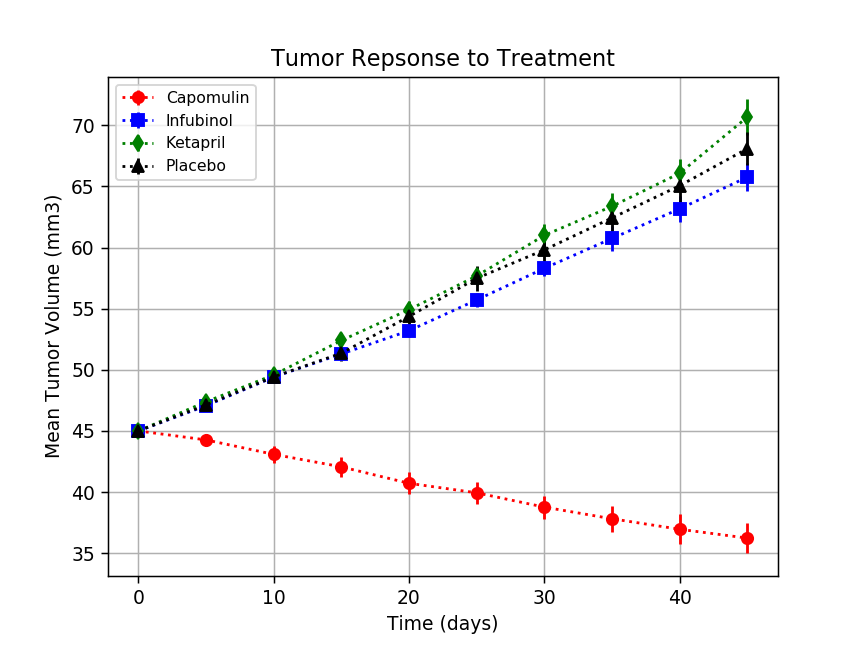

In [490]:
# Plot Figure 1
plt.figure(1)

# Create seperate line for each treatment group
plt.errorbar(meantumor_formatted["Timepoint"], meantumor_formatted["Capomulin"], yerr=semtumor_formatted["Capomulin"], 
            marker="o",linestyle=":",color="red", label="Capomulin")

plt.errorbar(meantumor_formatted["Timepoint"], meantumor_formatted["Infubinol"], yerr=semtumor_formatted["Infubinol"], 
            marker="s",linestyle=":", color="blue", label="Infubinol")

plt.errorbar(meantumor_formatted["Timepoint"], meantumor_formatted["Ketapril"], yerr=semtumor_formatted["Ketapril"], 
            marker="d",linestyle=":", color="green", label="Ketapril")

plt.errorbar(meantumor_formatted["Timepoint"], meantumor_formatted["Placebo"], yerr=semtumor_formatted["Placebo"], 
            marker="^",linestyle=":", color="black", label="Placebo")

# Add title and axis labels
plt.title("Tumor Repsonse to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Mean Tumor Volume (mm3)")

# Overlay grid
plt.grid()

# Define legend and set the location
plt.legend(loc="upper left", fontsize="small", fancybox=True)

# Display
plt.show()

## Metastatic Response to Treatment

In [491]:
# Get by group data
bydrugtimepoint = combined_trial_data.groupby(["Drug","Timepoint"], as_index=False)

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
bydrugtimepoint_meansites = bydrugtimepoint["Metastatic Sites"].mean()
bydrugtimepoint_meansites_df = pd.DataFrame(data=bydrugtimepoint_meansites)

# Preview DataFrame
bydrugtimepoint_meansites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [492]:
# Get by group data
bydrugtimepoint = combined_trial_data.groupby(["Drug","Timepoint"])

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
bydrugtimepoint_semsite = bydrugtimepoint["Metastatic Sites"].sem().reset_index()
bydrugtimepoint_semsite_df = pd.DataFrame(data=bydrugtimepoint_semsite)

# Preview DataFrame
bydrugtimepoint_semsite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [451]:
# Format mean dataframe for plotting
meansites_formatted = bydrugtimepoint_meansites_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
meansites_formatted.reset_index(level=0, inplace=True)
meansites_formatted.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [493]:
# Format standard error dataframe for plotting
semsites_formatted = bydrugtimepoint_semsite_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
semsites_formatted.reset_index(level=0, inplace=True)
semsites_formatted.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


<IPython.core.display.Javascript object>


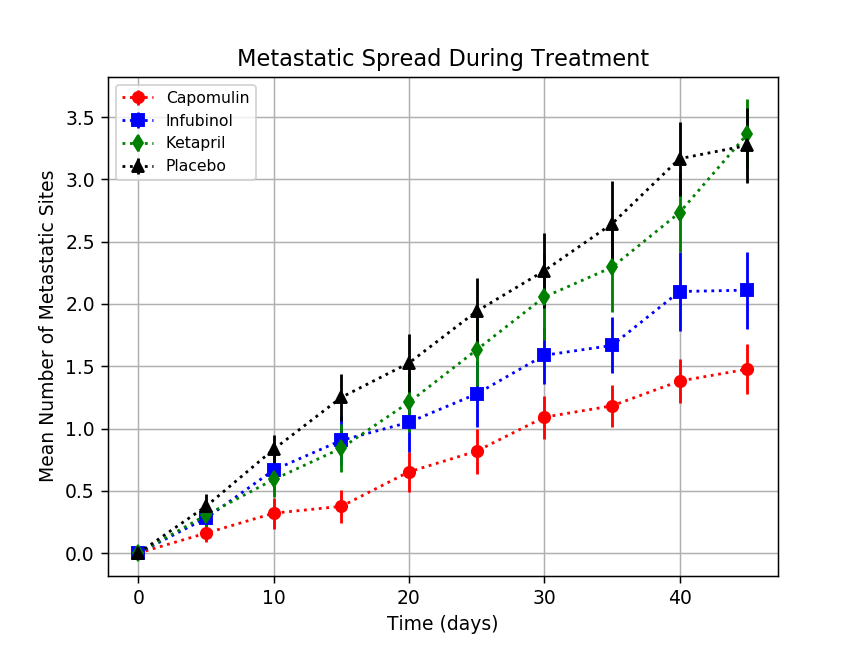

In [494]:
# Plot Figure 2
plt.figure(2)

# Create a separate line for each treatment group
plt.errorbar(meansites_formatted["Timepoint"], meansites_formatted["Capomulin"], yerr=semsites_formatted["Capomulin"], 
            marker="o",linestyle=":",color="red", label="Capomulin")

plt.errorbar(meansites_formatted["Timepoint"], meansites_formatted["Infubinol"], yerr=semsites_formatted["Infubinol"], 
            marker="s",linestyle=":", color="blue", label="Infubinol")

plt.errorbar(meansites_formatted["Timepoint"], meansites_formatted["Ketapril"], yerr=semsites_formatted["Ketapril"], 
            marker="d",linestyle=":", color="green", label="Ketapril")

plt.errorbar(meansites_formatted["Timepoint"], meansites_formatted["Placebo"], yerr=semsites_formatted["Placebo"], 
            marker="^",linestyle=":", color="black", label="Placebo")

# Add title and axis labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Mean Number of Metastatic Sites")

# Overlay grid
plt.grid()

# Define legend and set location
plt.legend(loc="upper left", fontsize="small", fancybox=True)

# Display
plt.show()

## Survival Rates

In [495]:
# Get by group data
bydrugtimepoint = combined_trial_data.groupby(["Drug","Timepoint"], as_index=False)

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
bydrugtimepoint_mousecount = bydrugtimepoint["Mouse ID"].count()
bydrugtimepoint_mousecount_df = pd.DataFrame(data=bydrugtimepoint_mousecount)

# Preview DataFrame
bydrugtimepoint_mousecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [496]:
# Format dataframe for plotting, subset on treatments of interest
mousecount_formatted_ = bydrugtimepoint_mousecount_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID')
mousecount_formatted = mousecount_formatted_[['Capomulin','Infubinol','Ketapril','Placebo']]
mousecount_formatted.head(10)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [497]:
# Calculate survival rates

# Create copy in order to create new variables
mousecount_formatted_copy = mousecount_formatted.copy()
mousecount_formatted_copy["Capomulin_percent"] = ((mousecount_formatted["Capomulin"]/25)*100).copy()
mousecount_formatted_copy["Infubinol_percent"] = ((mousecount_formatted["Infubinol"]/25)*100).copy()
mousecount_formatted_copy["Ketapril_percent"] = ((mousecount_formatted["Ketapril"]/25)*100).copy()
mousecount_formatted_copy["Placebo_percent"] = ((mousecount_formatted["Placebo"]/25)*100).copy()

mousecount_formatted_copy.reset_index(level=0, inplace=True)
mousecount_formatted_copy.head()


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0,25,25,25,25,100.0,100.0,100.0,100.0
1,5,25,25,23,24,100.0,100.0,92.0,96.0
2,10,25,21,22,24,100.0,84.0,88.0,96.0
3,15,24,21,19,20,96.0,84.0,76.0,80.0
4,20,23,20,19,19,92.0,80.0,76.0,76.0


<IPython.core.display.Javascript object>


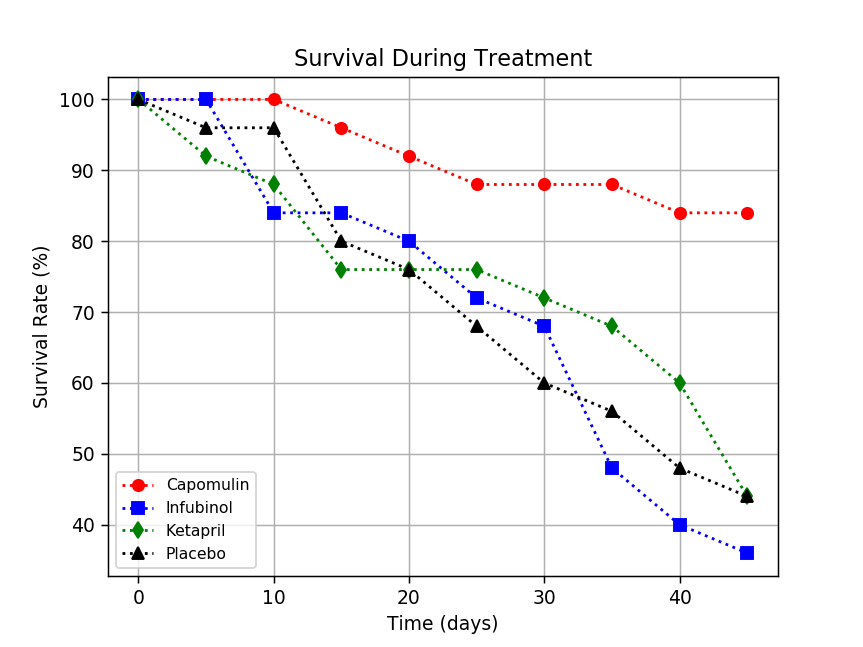

In [498]:
# Plot Figure 3
plt.figure(3)

# Plot line for each treatment 
plt.plot(mousecount_formatted_copy["Timepoint"], mousecount_formatted_copy["Capomulin_percent"], 
            marker="o",linestyle=":",color="red", label="Capomulin")

plt.plot(mousecount_formatted_copy["Timepoint"], mousecount_formatted_copy["Infubinol_percent"], 
            marker="s",linestyle=":", color="blue", label="Infubinol")

plt.plot(mousecount_formatted_copy["Timepoint"], mousecount_formatted_copy["Ketapril_percent"], 
            marker="d",linestyle=":", color="green", label="Ketapril")

plt.plot(mousecount_formatted_copy["Timepoint"], mousecount_formatted_copy["Placebo_percent"],
            marker="^",linestyle=":", color="black", label="Placebo")

# Add title and axis labels
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Overlay a grid
plt.grid()

# Specify legend and select location
plt.legend(loc="lower left", fontsize="small", fancybox=True)

# Display
plt.show()

## Summary Bar Graph

In [458]:
# Get by group data
bydrugtimepoint = combined_trial_data.groupby(["Drug","Timepoint"], as_index=False)

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
bydrugtimepoint_meantumor = bydrugtimepoint["Tumor Volume (mm3)"].mean()
bydrugtimepoint_meantumor_df = pd.DataFrame(data=bydrugtimepoint_meantumor)

# Subset on drugs of interest
bydrugtimepoint_meantumor_reduced = bydrugtimepoint_meantumor_df.loc[(bydrugtimepoint_meantumor_df["Drug"]=="Capomulin") | 
                                                                     (bydrugtimepoint_meantumor_df["Drug"]=="Infubinol") | 
                                                                     (bydrugtimepoint_meantumor_df["Drug"]=="Ketapril") |
                                                                     (bydrugtimepoint_meantumor_df["Drug"]=="Placebo")]

# Subset on first and last values to caculate percent change
timepoint_0 = bydrugtimepoint_meantumor_reduced.loc[bydrugtimepoint_meantumor_reduced["Timepoint"]==0]
timepoint_45 = bydrugtimepoint_meantumor_reduced.loc[bydrugtimepoint_meantumor_reduced["Timepoint"]==45]

# Caclulate percent change and check results
percent_change = pd.merge(timepoint_0, timepoint_45, how='outer', on='Drug')
percent_change["Percent Change"] = ((percent_change["Tumor Volume (mm3)_y"]-percent_change["Tumor Volume (mm3)_x"])/percent_change["Tumor Volume (mm3)_x"])*100
percent_change.head()

,Drug,Timepoint_x,Tumor Volume (mm3)_x,Timepoint_y,Tumor Volume (mm3)_y,Percent Change
0,Capomulin,0,45.0,45,36.236114,-19.475303
1,Infubinol,0,45.0,45,65.755562,46.123472
2,Ketapril,0,45.0,45,70.662958,57.028795
3,Placebo,0,45.0,45,68.084082,51.297960


In [499]:
# Create two seperate data frames for positive and negative change
positive = percent_change.loc[percent_change["Percent Change"]>=0]
negative = percent_change.loc[percent_change["Percent Change"]<0]

<IPython.core.display.Javascript object>


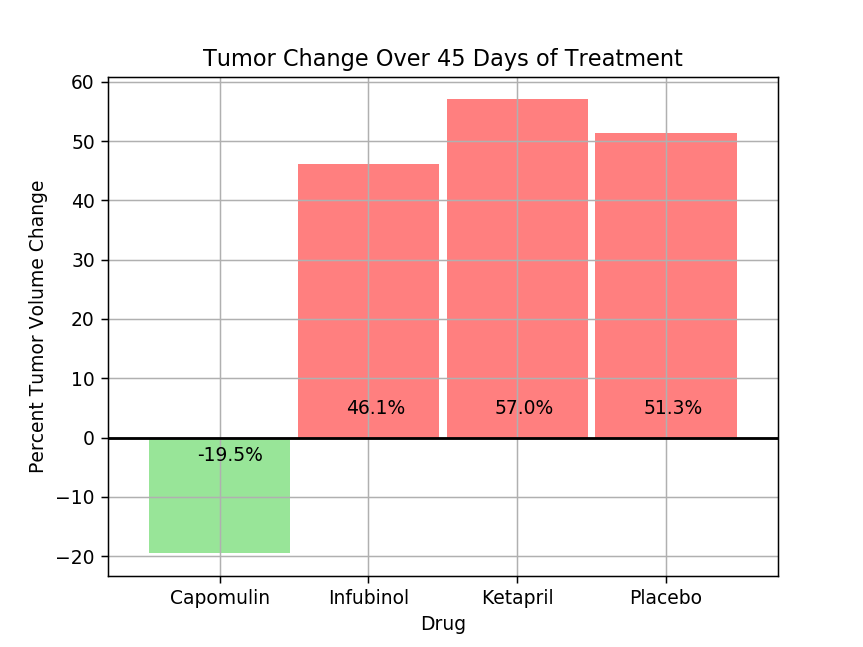

In [500]:
# Plot figure 4
plt.figure(4)

# Plot the positive change and negative change results
plt.bar(negative["Drug"], negative["Percent Change"], width, color='limegreen', alpha=0.5, align="center")
plt.bar(positive["Drug"], positive["Percent Change"], width, color='red', alpha=0.5, align="center")

# Format width of bars
width=.95

# Add horizontal reference line
plt.hlines(0, -0.75, 3.75, color="black")

# Title and axis labels
plt.title("Tumor Change Over 45 Days of Treatment")
plt.xlabel("Drug")
plt.ylabel("Percent Tumor Volume Change")

# Sets the x limits of the current chart
plt.xlim(-0.75, 3.75)

# Create bar labels
label= percent_change['Percent Change'].map('{0:.1f}%'.format)
yheight = [-4,4,4,4]
 
for i in range(len(percent_change)):
    plt.text(x = i-.15 , y = yheight[i], s = label[i], size = 10)

# Overlay grid
plt.grid()

# Display
fig.show()